# Network 

## Make the network

In [1]:
import networkx as nx
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd


# Load the character attributes data
character_data = pd.read_csv('character_attributes.csv')

# Load the connections data
connections_data = pd.read_csv('character_connections.csv')

# Create a graph object
G = nx.Graph()

# Add nodes to the graph with character attributes
for index, row in character_data.iterrows():
    G.add_node(row['character'], dialogue_count=row['dialogue_count'],
                                scene_count=row['scene_count'], 
                                arc_presence=row['arc_presence'],
                                positive_proportion=row['positive_proportion'],
                                negative_proportion=row['negative_proportion'],
                                neutral_proportion=row['neutral_proportion'],)

# Add edges to the graph with the count as weight
for index, row in connections_data.iterrows():
    pair = eval(row['pair'])  # Convert the string tuple to an actual tuple
    count = row['count']
    G.add_edge(pair[0], pair[1], weight=count)


# Extract the largest connected component
largest_component = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_component).copy()

# Save the graph as a .pkl file
with open('largest_component_graph.pkl', 'wb') as file:
    pkl.dump(G, file)

# To load the graph use the following code
# with open("largest_component_graph.pkl", "rb") as f: 
# G = pkl.load(f)

# Basic Statistics 

Number of Nodes: 313, Number of Edges: 965
Density of the Network: 0.01976325059392152


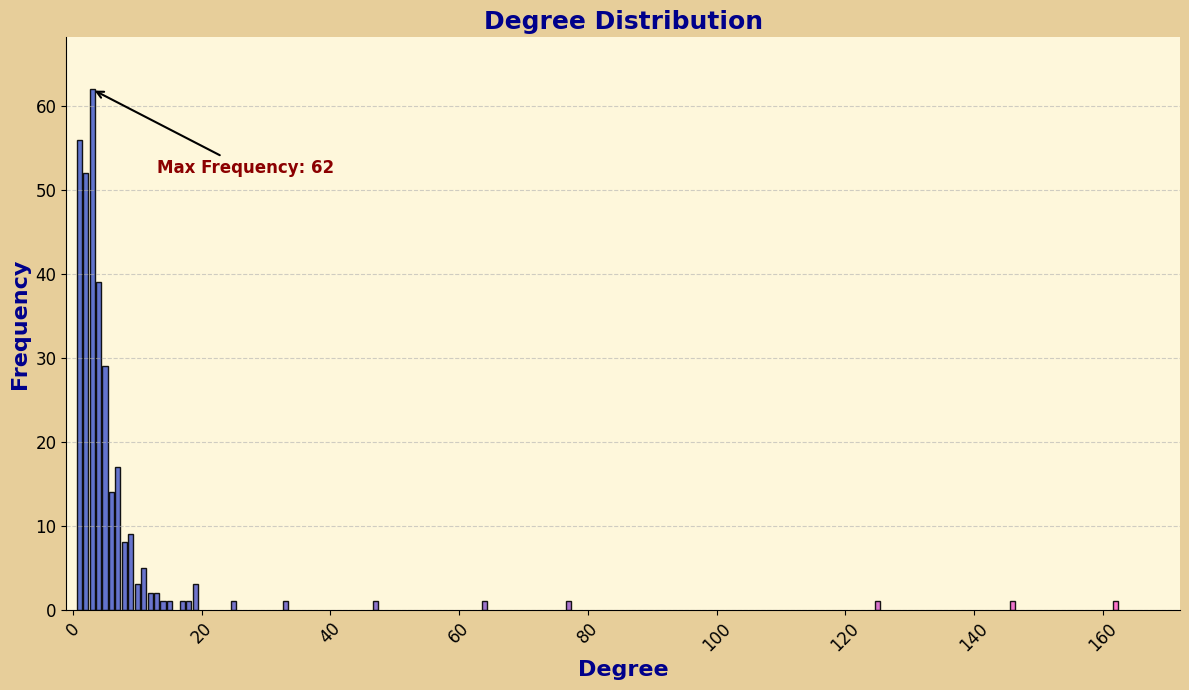

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of Nodes: {num_nodes}, Number of Edges: {num_edges}")

density = nx.density(G)
print(f"Density of the Network: {density}")

# Degree distribution
degree_counts = [G.degree(n) for n in G.nodes()]
unique_degrees = sorted(set(degree_counts))
degree_frequencies = [degree_counts.count(d) for d in unique_degrees]

# Visualization with improved aesthetics
fig, ax = plt.subplots(figsize=(12, 7))

# Colors
beige = (254 / 255, 247 / 255, 219 / 255)
desert_sand = (231 / 255, 206 / 255, 154 / 255)

# Set figure and subplot background colors
fig.patch.set_facecolor(desert_sand)
ax.set_facecolor(beige)

# Plot bars with gradient color
bar_colors = [(0.3 + (d / max(unique_degrees)) * 0.7, 0.4, 0.8) for d in unique_degrees]
ax.bar(unique_degrees, degree_frequencies, alpha=0.9, color=bar_colors, edgecolor='black', width=0.8)

# Add labels, title, and customize fonts
ax.set_title("Degree Distribution", fontsize=18, fontweight='bold', color='darkblue')
ax.set_xlabel("Degree", fontsize=16, fontweight='bold', color='darkblue')
ax.set_ylabel("Frequency", fontsize=16, fontweight='bold', color='darkblue')

# Customize ticks and their size
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

# Set x-axis limits for better spacing and y-axis scale
ax.set_xlim(-1, max(unique_degrees) + 10)
ax.set_ylim(0, max(degree_frequencies) * 1.1)

# Add gridlines
ax.grid(visible=True, which='major', axis='y', linestyle='--', alpha=0.6)

# Highlight the largest frequency with text annotation
max_frequency = max(degree_frequencies)
max_degree = unique_degrees[degree_frequencies.index(max_frequency)]
ax.annotate(
    f"Max Frequency: {max_frequency}",
    xy=(max_degree, max_frequency),
    xytext=(max_degree + 10, max_frequency - 10),
    fontsize=12,
    fontweight='bold',
    color='darkred',
    arrowprops=dict(facecolor='darkred', arrowstyle="->", lw=1.5),
)

# Remove top and right borders for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Degree Distribution
The degree distribution (shown in the plot) highlights that most characters have a low degree (few connections), while a small number of central characters have significantly higher degrees. This is characteristic of a **scale-free network**, where a few nodes act as hubs.

# Network Analysis of Avatar Character Network

## Basic Network Properties
- **Number of Nodes**: 315  
- **Number of Edges**: 970  
- **Density of the Network**: 0.0196  

The network is sparse, with a low density of approximately 0.02. This indicates that only about 2% of all possible connections between characters exist.


- **Focused Interactions**:
  - The low density reflects that interactions in *Avatar: The Last Airbender* are carefully curated. Not all characters interact with each other directly, which mirrors the storytelling approach where interactions are meaningful and often tied to specific arcs.
  - For example, members of the Fire Nation may primarily interact with one another and only occasionally with Team Avatar.

- **Diverse Subgroups**:
  - Sparsity allows for the formation of distinct character clusters or subgroups, like Team Avatar, the Fire Nation royal family, or supporting side characters. These clusters align with the show’s narrative structure, which frequently shifts focus between different character groups.

- **Character-Driven Narrative**:
  - In a sparse network, hubs (central characters like Aang or Sokka) become even more crucial for maintaining connectivity. This reflects the show’s reliance on core characters to drive the plot while others appear more sporadically based on the needs of the story.


The sparsity of the network highlights:
- **Intentional Relationships**: Character interactions are deliberate and tied to the story's progression rather than being random or excessive.
- **Narrative Flow**: Characters are introduced and interact based on relevance to specific episodes or arcs, avoiding unnecessary complexity.
- **Hubs and Bridges**: Core characters act as hubs, while others serve as bridges between different groups. This structure supports a cohesive yet expansive narrative, where key players maintain the story's connectivity.

## Centrality Measures:

In [7]:
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Degree Centrality:", top_degree)

betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Betweenness Centrality:", top_betweenness)

closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Closeness Centrality:", top_closeness)


eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Characters by Eigenvector Centrality:", top_eigenvector)



Top 10 Characters by Degree Centrality: [('aang', 0.5192307692307692), ('sokka', 0.46794871794871795), ('katara', 0.4006410256410256), ('zuko', 0.24679487179487178), ('toph', 0.20512820512820512), ('iroh', 0.15064102564102563), ('azula', 0.10576923076923077), ('suki', 0.08012820512820512), ('zhao', 0.060897435897435896), ('jet', 0.060897435897435896)]
Top 10 Characters by Betweenness Centrality: [('aang', 0.3531350231395516), ('sokka', 0.2659662350861756), ('zuko', 0.19879692354958797), ('katara', 0.18853024700833662), ('toph', 0.08935389571567368), ('shinu', 0.07377169582144058), ('iroh', 0.06728870536696921), ('azula', 0.053018454036663776), ('warden', 0.05153471195726276), ('mai', 0.04950412438466995)]
Top 10 Characters by Closeness Centrality: [('aang', 0.6638297872340425), ('sokka', 0.6303030303030303), ('katara', 0.6034816247582205), ('zuko', 0.5473684210526316), ('toph', 0.5370051635111877), ('iroh', 0.5123152709359606), ('azula', 0.5016077170418006), ('suki', 0.4968152866242038

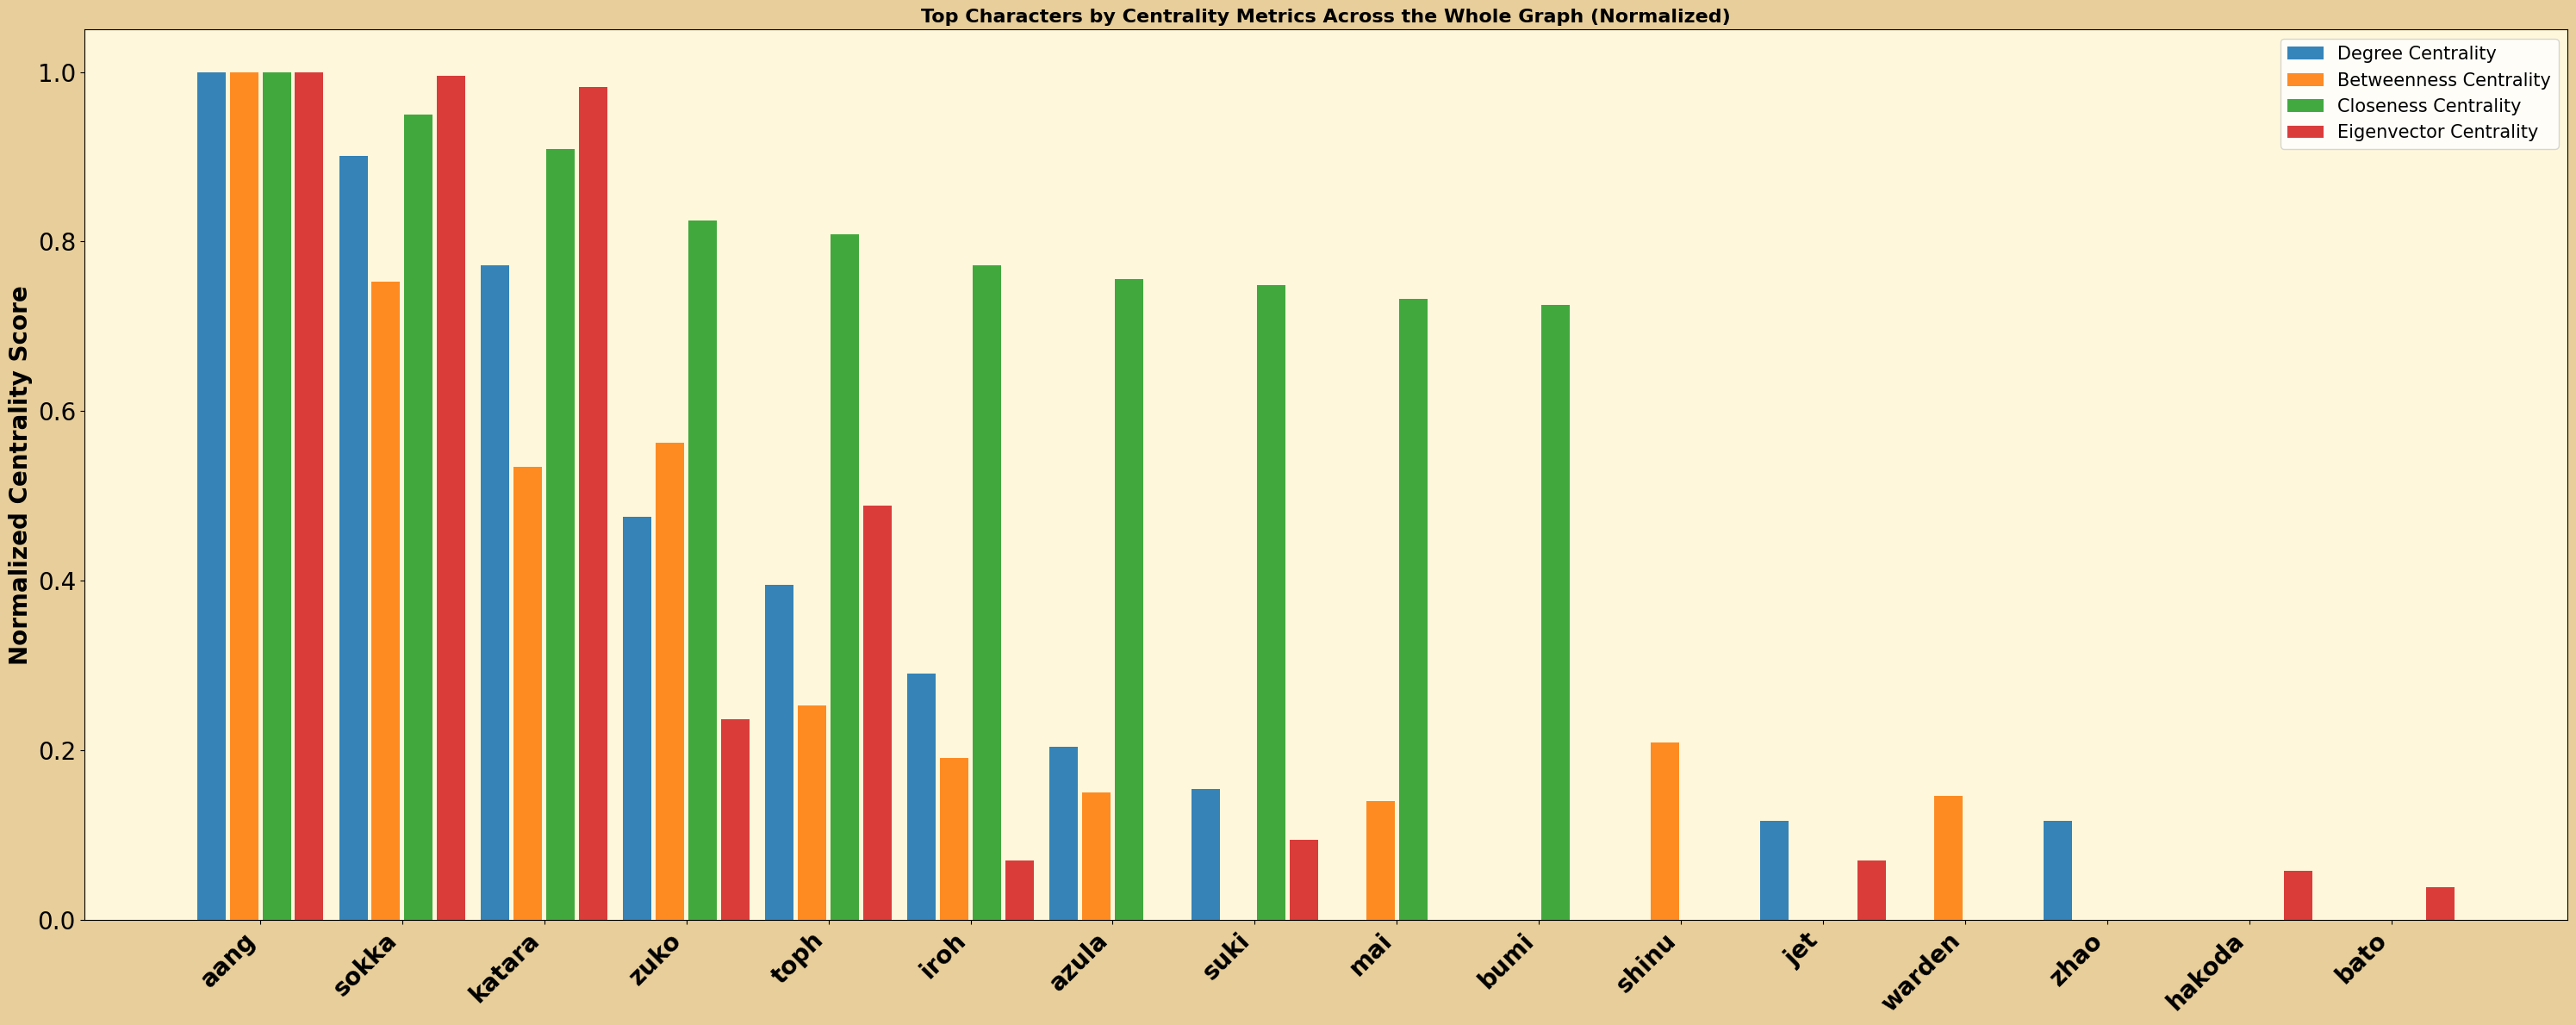

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Combine data for visualization
metrics = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']
centrality_data = {
    'Degree Centrality': top_degree,
    'Betweenness Centrality': top_betweenness,
    'Closeness Centrality': top_closeness,
    'Eigenvector Centrality': top_eigenvector
}

# Collect all unique characters across metrics
all_chars = set()
for metric in metrics:
    all_chars.update([x[0] for x in centrality_data[metric]])

# Prepare data for plotting
all_chars = list(all_chars)
plot_data = []
max_scores = {metric: max([x[1] for x in centrality_data[metric]]) for metric in metrics if centrality_data[metric]}

# Compute normalized scores
char_scores = {char: 0 for char in all_chars}  # Sum of normalized scores for ordering
for metric in metrics:
    metric_scores = []
    for char in all_chars:
        score = dict(centrality_data[metric]).get(char, 0)
        normalized_score = score / max_scores[metric] if metric in max_scores and max_scores[metric] > 0 else 0
        metric_scores.append(normalized_score)
        char_scores[char] += normalized_score
    plot_data.append(metric_scores)

# Order characters by their total normalized score
sorted_chars = sorted(char_scores.keys(), key=lambda c: char_scores[c], reverse=True)
sorted_plot_data = [[scores[all_chars.index(char)] for char in sorted_chars] for scores in plot_data]


# Visualization
fig, ax = plt.subplots(figsize=(30, 12))
ax.tick_params(axis='y', labelsize=20)  # Adjust 'labelsize' to your desired font size


# Increase the width of the bars
bar_width = 0.2
x = np.arange(len(sorted_chars))

# Colors
beige = (254 / 255, 247 / 255, 219 / 255)
desert_sand = (231 / 255, 206 / 255, 154 / 255)

# Set figure and subplot background colors
fig.patch.set_facecolor(desert_sand)
ax.set_facecolor(beige)

# Plot bars
for i, metric in enumerate(metrics):
    offset = (i - (len(metrics) - 1) / 2) * (bar_width + 0.03)
    ax.bar(x + offset, sorted_plot_data[i], width=bar_width, label=metric, alpha=0.9)

# Add labels, title, legend
ax.set_xticks(x)
ax.set_xticklabels(sorted_chars, rotation=45, ha='right', fontsize=20, fontweight='bold')
ax.set_ylabel('Normalized Centrality Score', fontsize=20, fontweight='bold')
ax.set_title('Top Characters by Centrality Metrics Across the Whole Graph (Normalized)', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=15)


plt.tight_layout()
plt.show()


### Centrality Insights: Key Characters and Their Network Roles

#### **1. Degree Centrality**
- **What It Measures**: How many direct connections a character has.
- **Key Figures**:
  - **Aang** (0.52): The central figure with the most connections, driving the story forward.
  - **Sokka** (0.47) and **Katara** (0.40): Their active involvement across groups reflects their high connectivity.
  - **Zuko** (0.25): A focused but significant presence as a primary antagonist and later ally.
  - **Toph** and **Iroh**: Moderate scores reflect their strong but more concentrated roles.
  - **Zhao** and **Jet**: Limited scores align with their smaller, episodic impact.

#### **2. Betweenness Centrality**
- **What It Measures**: How often a character bridges different groups or factions.
- **Key Figures**:
  - **Aang** (0.35): A bridge across nations, uniting disparate characters and factions.
  - **Sokka** (0.27): A tactical planner who frequently connects groups.
  - **Zuko** (0.20): His arc of shifting allegiances positions him as a key narrative link.
  - **Shinu** and **Warden**: High scores due to their plot-relevant roles as connectors.
  - **Mai** and **Azula**: Moderate scores reflect their role in linking Fire Nation politics to the wider story.

#### **3. Closeness Centrality**
- **What It Measures**: How quickly a character can interact with others in the network.
- **Key Figures**:
  - **Aang** (0.66): The most accessible character, consistently interacting across the network.
  - **Sokka** (0.63) and **Katara** (0.60): Reflect their proximity to the action and key relationships.
  - **Zuko** (0.55): High involvement across major plotlines keeps him central.
  - **Azula** (0.50), **Suki**, and **Mai**: Moderate scores emphasize their role in specific arcs.

#### **4. Eigenvector Centrality**
- **What It Measures**: How well-connected a character is to other influential characters.
- **Key Figures**:
  - **Aang** (0.55), **Sokka** (0.55), and **Katara** (0.54): Strong ties to influential characters solidify their leadership roles.
  - **Toph** (0.27): Reflects her integration into the main group and her limited but impactful connections.
  - **Zuko** (0.13): Lower score indicates his shifting allegiances and fewer consistent ties to highly connected characters.
  - **Suki** (0.05), **Iroh** (0.04), and **Jet** (0.04): Highlight their supporting roles and specific arc-based contributions.

### **Key Takeaways**
1. **Aang, Sokka, and Katara** dominate across all centrality metrics, reinforcing their core roles in the narrative.
2. **Zuko** stands out as a narrative bridge (high betweenness), but his shifting loyalties limit his eigenvector score, reflecting fewer ties to consistently influential characters.
3. **Toph and Iroh** play pivotal yet concentrated roles, evident in their moderate scores across most metrics.
4. Supporting characters like **Azula**, **Suki**, and **Mai** show specialized influence, tied to specific arcs rather than overall network connectivity.
5. **Eigenvector Centrality** highlights how characters like Aang, Sokka, and Katara maintain strong ties to other key players, cementing their influence in both individual arcs and the overarching story.

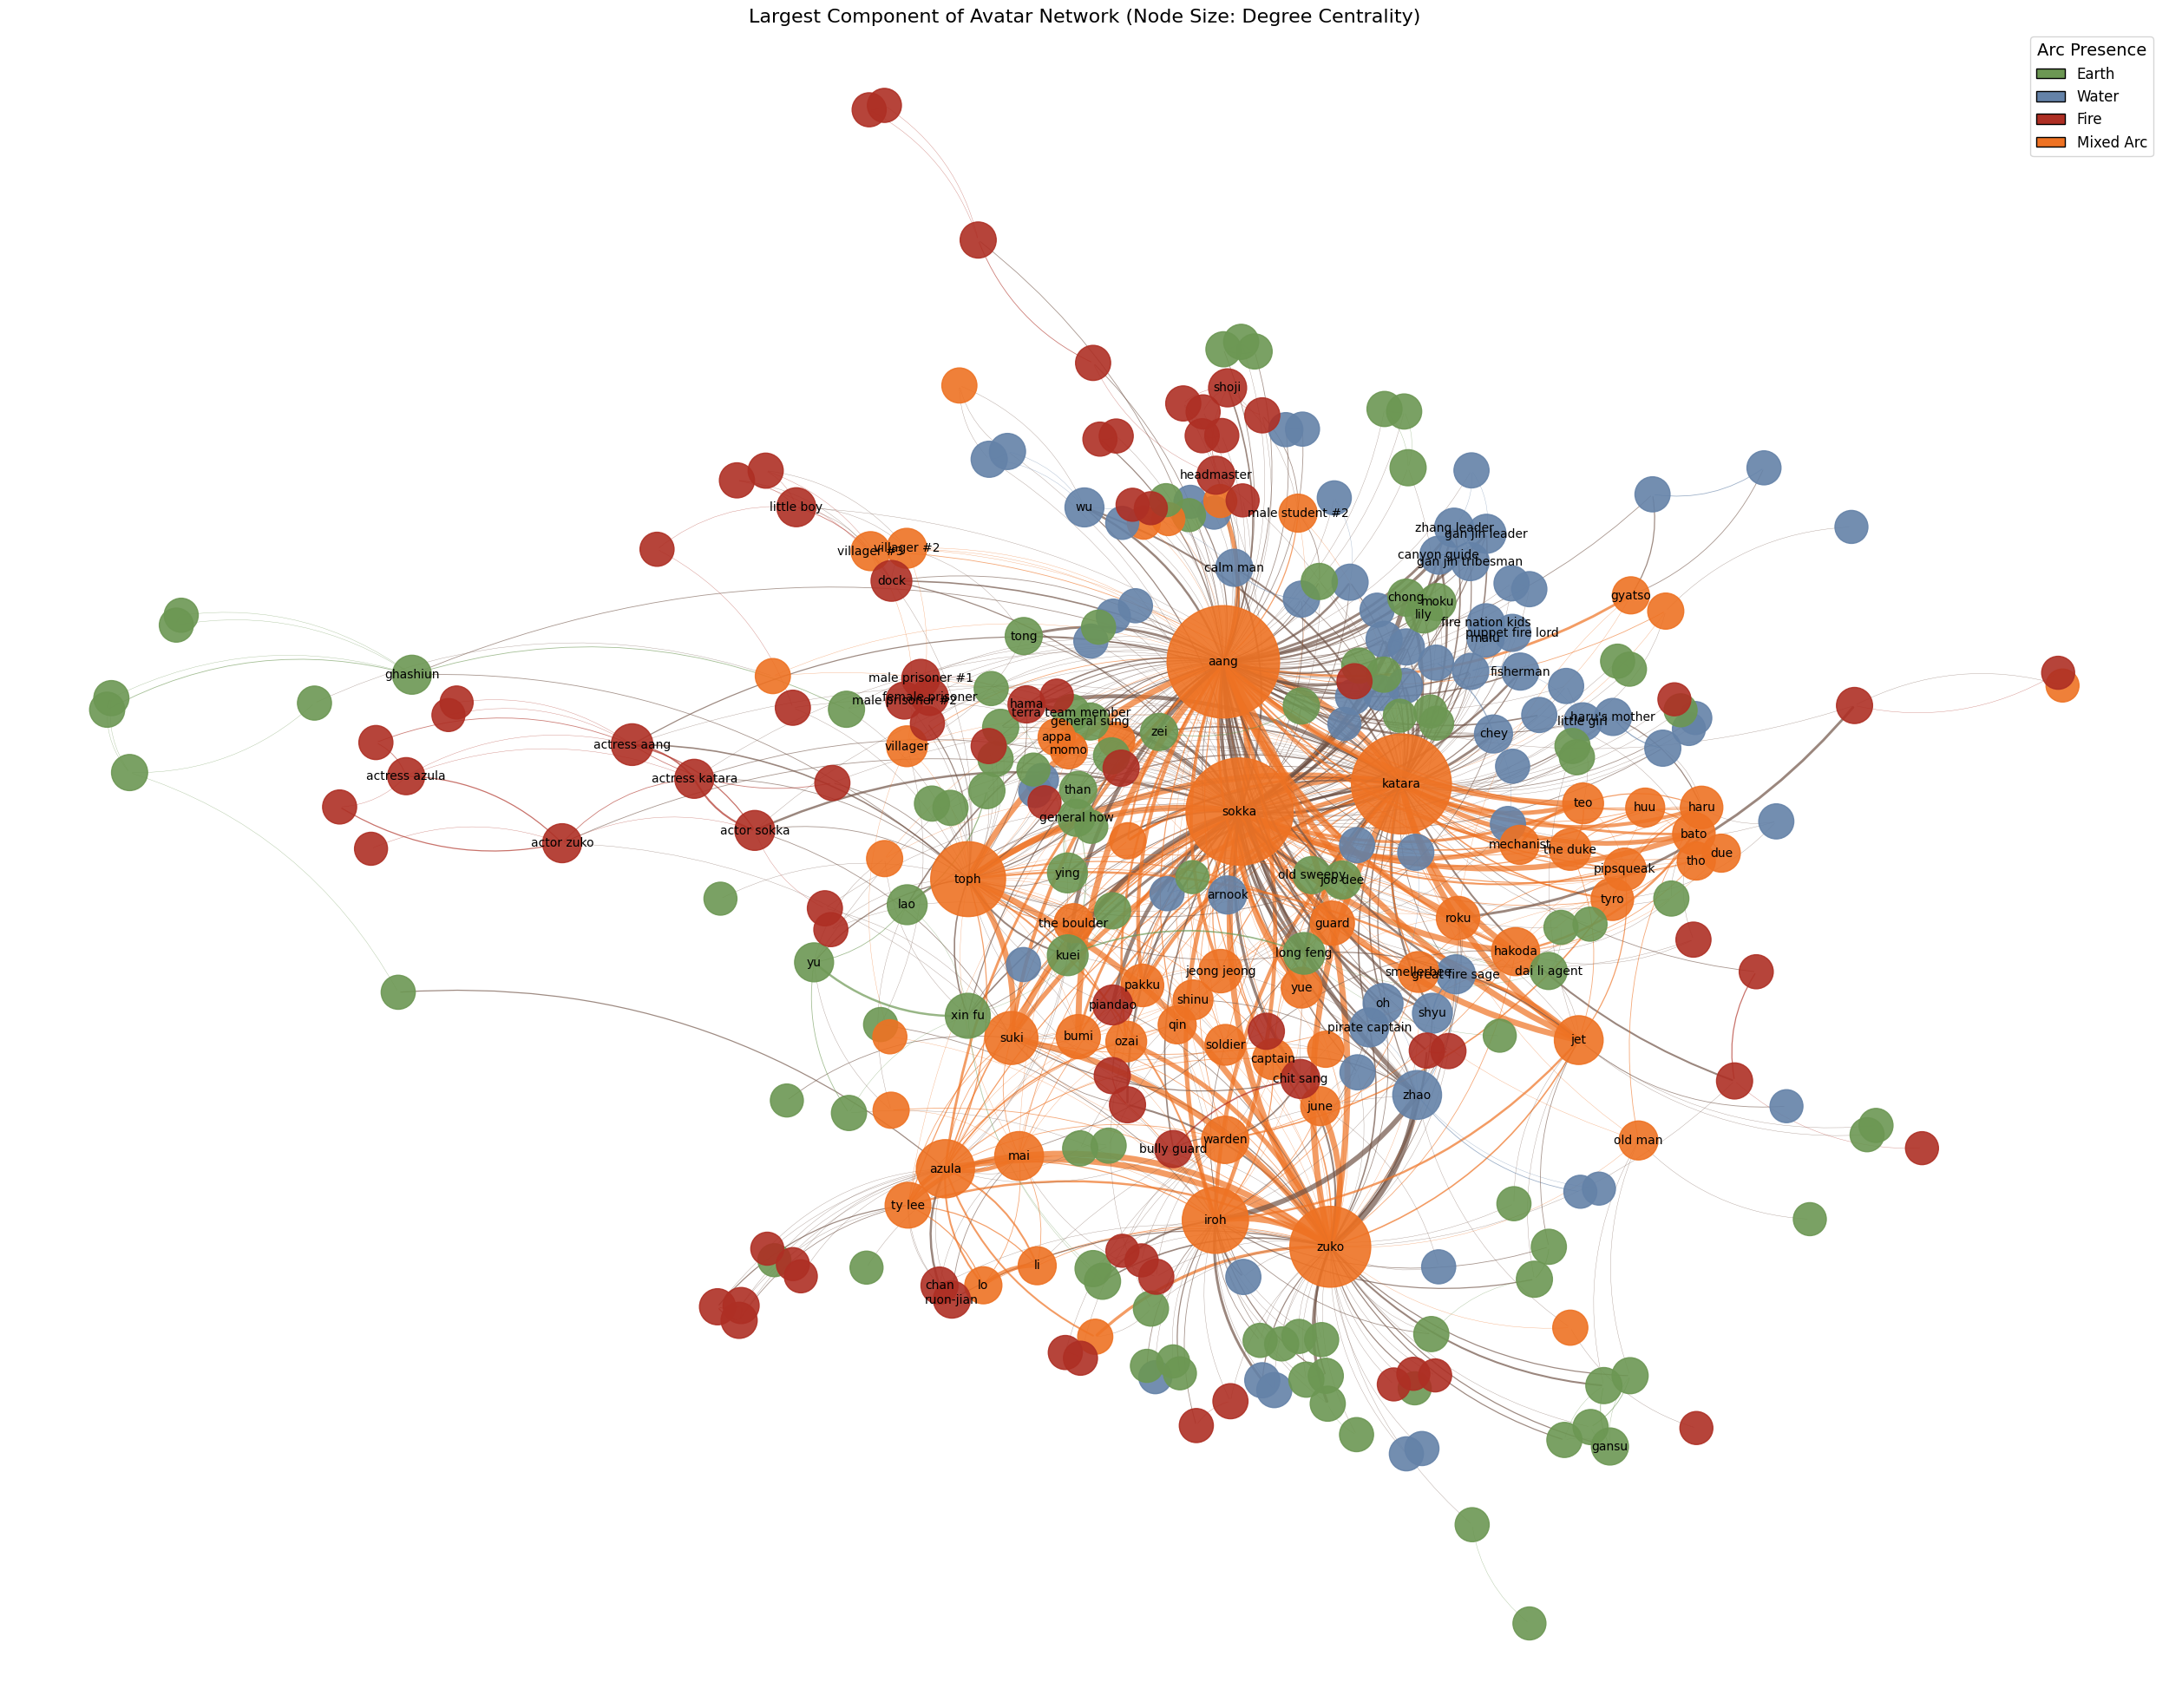

In [5]:
from matplotlib.patches import Patch, FancyArrowPatch
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Initialize ForceAtlas2 for layout generation
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,
    adjustSizes=False,
    edgeWeightInfluence=1,
    jitterTolerance=1,
    barnesHutOptimize=True,
    barnesHutTheta=0,
    multiThreaded=False,
    scalingRatio=0.000001,
    strongGravityMode=False,
    gravity=0.0001,
    verbose=False
)

# Compute positions using ForceAtlas2
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=1000)

positions = {
    node: (x * 5, y * 5)  # Multiplying by 5 will spread them out more
    for node, (x, y) in positions.items()
}

# Define a function to determine node colors based on arc presence
def get_node_color(arc_presence):
    earth_color = "#6C9753"  # Green
    water_color = "#6482A8"  # Blue
    fire_color = "#AE2F24"   # Red
    mixed_color = "#EE7223"  # Orange
    default_color = "#715447"

    colors = []
    if "earth" in arc_presence.lower():
        colors.append(earth_color)
    if "water" in arc_presence.lower():
        colors.append(water_color)
    if "fire" in arc_presence.lower():
        colors.append(fire_color)
    if len(colors) == 1:
        return colors[0]
    elif len(colors) > 1:
        return mixed_color  # Use mixed color for multiple arcs
    return default_color  # Default color for no arcs

# Calculate degree centrality for node sizes
degree_centrality = nx.degree_centrality(G)
max_degree_centrality = max(degree_centrality.values()) if degree_centrality else 1

# Get node sizes and colors based on degree centrality
node_sizes = []
node_colors = []

for node, attributes in G.nodes(data=True):
    arc_presence = attributes.get("arc_presence", "")

    # Scale node size based on degree centrality
    centrality = degree_centrality.get(node, 0)
    scaled_size = 700 + (centrality / max_degree_centrality) * 8000  # Adjust scaling factor as needed
    node_sizes.append(scaled_size)

    # Node color
    node_colors.append(get_node_color(arc_presence))

# Define a function to determine edge colors based on connected nodes
def get_edge_color(u, v):
    u_color = get_node_color(G.nodes[u].get("arc_presence", ""))
    v_color = get_node_color(G.nodes[v].get("arc_presence", ""))
    return u_color if u_color == v_color else "#715447"

# Define a scaling factor and cap for edge widths
scaling_factor = 0.3
max_width = 5
edge_widths = [
    min(G[u][v].get('weight', 1) * scaling_factor, max_width) 
    for u, v in G.edges()
]

# Get edge colors
edge_colors = [get_edge_color(u, v) for u, v in G.edges()]

# Create legend elements
legend_elements = [
    Patch(facecolor="#6C9753", edgecolor="black", label="Earth"),
    Patch(facecolor="#6482A8", edgecolor="black", label="Water"),
    Patch(facecolor="#AE2F24", edgecolor="black", label="Fire"),
    Patch(facecolor="#EE7223", edgecolor="black", label="Mixed Arc")
]

# Visualization
fig, ax = plt.subplots(figsize=(32, 25))
plt.axis("off")

# Draw nodes
nx.draw_networkx_nodes(
    G, positions, 
    node_size=node_sizes, 
    node_color=node_colors, 
    alpha=0.9,
    ax=ax
)

# Identify key nodes for labeling
threshold = np.percentile(list(degree_centrality.values()), 60)  # Adjust percentage as needed
key_nodes = [node for node, centrality in degree_centrality.items() if centrality > threshold]

nx.draw_networkx_labels(
    G, positions, 
    labels={node: node for node in key_nodes}, 
    font_size=10, 
    font_color="black",
    ax=ax
)

# Draw curved edges using FancyArrowPatch
for ((u, v), w, c) in zip(G.edges(), edge_widths, edge_colors):
    x1, y1 = positions[u]
    x2, y2 = positions[v]

    # Determine alpha based on width
    alpha_val = min(0.5 + w / max_width, 0.7)

    # Create a curved edge
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        connectionstyle="arc3,rad=0.2",  # Adjust rad for more/less curve
        color=c,
        alpha=alpha_val,
        linewidth=w,
        arrowstyle='-'
    )
    ax.add_patch(arrow)

# Add legend
plt.legend(handles=legend_elements, loc="upper right", fontsize=12, title="Arc Presence", title_fontsize=14)

plt.title("Largest Component of Avatar Network (Node Size: Degree Centrality)", fontsize=16)
plt.show()


### **1. Node Sizes and Centrality**
The **size of the nodes** reflects how central a character is in the story, likely based on their connections. Unsurprisingly, **Aang**, **Sokka**, and **Katara** dominate, as the narrative revolves around their interactions with allies, enemies, and neutral parties. Characters like **Zuko** and **Toph** have moderately large nodes, underscoring their importance while still being secondary to the main trio. Zuko’s node stands out, as it shows his narrative overlap with various factions, from Team Avatar to Fire Nation.


### **2. Color Coding by Arc Presence**
Node colors represent the arcs where characters primarily appear:
- **Orange**: Characters spanning multiple arcs (Team Avatar).
- **Blue**: Water-related arcs.
- **Green**: Earth-related arcs.
- **Red**: Fire-related arcs.

The dominance of **orange nodes** at the graph’s center underscores Team Avatar’s role as the connective thread between storylines. **Red nodes** cluster on the periphery, indicating their focus within Fire Nation-specific plots. Meanwhile, **green nodes** spread more widely, reflecting the diversity of Earth Kingdom settings and characters.


### **3. Cluster Formation**
The graph highlights distinct clusters that mirror the show’s social dynamics:
- **Team Avatar**: A dense central cluster featuring Aang, Katara, Sokka, and close allies like Toph and Iroh. Zuko bridges this group and the Fire Nation.
- **Fire Nation**: Surrounding Azula, Mai, and Ty Lee, this cluster reflects their role as antagonists. Zuko’s shifting allegiance places him between this group and Team Avatar.
- **Peripheral Clusters**: Groups like Jet’s Freedom Fighters and the Dai Li form isolated clusters, emphasizing their plot-specific roles. The **Ember Island Players** stand out as their own quirky, self-contained group.



### **4. Bridges Between Clusters**
Certain characters bridge otherwise separate groups:
- **Zuko**: His position reflects his transformation from antagonist to ally, connecting Fire Nation politics to Team Avatar’s journey.
- **Iroh**: As a mediator and mentor, Iroh links Zuko to other factions, particularly as his ties to Team Avatar deepen.

These bridges underscore the story’s complexity, where shifting loyalties evolve the network.

### **5. Density and Overlap**
The graph’s center is densely packed, representing the deeply interconnected main cast, while the periphery houses more isolated, arc-specific characters like Jet or the Ember Island Players. **Blue nodes** (water arcs) cluster near the center, highlighting frequent interactions with the main cast, while **green nodes** (earth arcs) are more dispersed, mirroring the Earth Kingdom’s breadth. **Red nodes** (fire arcs) often remain peripheral until Fire Nation factions directly engage with Team Avatar. 

